# Preprocesamiento y limpieza de la información

In [1]:
# Se importan las librerias comunes.
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import io 
import seaborn as sns
from datetime import datetime as dt
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

In [2]:
# Se carga el conjunto de datos
FPC = pd.read_csv("FPC_2015_2018.csv")

In [3]:
# Se realiza una exploración superficial de los datos en cuanto a columnas de los datos cargados
FPC.columns.values

array(['Url', 'Etapa', 'Sem', 'Anno', 'Fecha', 'Partido', 'EquipoLoc',
       'EquipoVis', 'FTR', 'GolLoc', 'GolVis', 'PtsLoc', 'PtsVis',
       'PosLoc', 'PosVis', 'TirosLoc', 'TirosVis', 'FaltasLoc',
       'FaltasVis', 'FLugarLoc', 'FlugarVis', 'TarAmaLoc', 'TarAmaVis',
       'TarRojLoc', 'TarRojVis', 'DiaNom', 'Dia', 'Mes', 'Hora',
       'Fec_Partido'], dtype=object)

In [4]:
# Exploración de los primeros 5 registros para verificar que la innformación haya sido cargado de forma correcta.
FPC.head() 

,Url,Etapa,Sem,Anno,Fecha,Partido,EquipoLoc,EquipoVis,FTR,GolLoc,...,FlugarVis,TarAmaLoc,TarAmaVis,TarRojLoc,TarRojVis,DiaNom,Dia,Mes,Hora,Fec_Partido
0,https://colombia.as.com/resultados/futbol/colo...,Regular,1,2015,Fecha - 1,Millonarios - Pasto,Millonarios,Pasto,L,5,...,2,1,3,0,0,Miercoles,25,Marzo,8:00:00 p. m.,25/03/2015
1,https://colombia.as.com/resultados/futbol/colo...,Regular,1,2015,Fecha - 1,Cortulua - Envigado,Cortulua,Envigado,E,1,...,2,4,3,1,0,Viernes,30,Enero,7:45:00 p. m.,30/01/2015
2,https://colombia.as.com/resultados/futbol/colo...,Regular,1,2015,Fecha - 1,Tolima - Chico,Tolima,Chico,L,4,...,0,2,3,0,0,Sabado,31,Enero,3:15:00 p. m.,31/01/2015
3,https://colombia.as.com/resultados/futbol/colo...,Regular,1,2015,Fecha - 1,Once Caldas - Medellin,Once Caldas,Medellin,V,0,...,2,1,3,0,0,Sabado,31,Enero,5:30:00 p. m.,31/01/2015
4,https://colombia.as.com/resultados/futbol/colo...,Regular,1,2015,Fecha - 1,Nacional - Rionegro Aguilas,Nacional,Rionegro Aguilas,L,2,...,3,3,3,0,0,Sabado,31,Enero,7:45:00 p. m.,31/01/2015


In [5]:
# Eliminación de columnas no necesarias para construcción del modelo de predicción.
FPC = FPC.drop(['Url','Etapa','DiaNom','Dia','Mes','Hora','Fec_Partido','Sem','Anno','Fecha','Partido'],axis=1)
FPC.head(10)

,EquipoLoc,EquipoVis,FTR,GolLoc,GolVis,PtsLoc,PtsVis,PosLoc,PosVis,TirosLoc,TirosVis,FaltasLoc,FaltasVis,FLugarLoc,FlugarVis,TarAmaLoc,TarAmaVis,TarRojLoc,TarRojVis
0,Millonarios,Pasto,L,5,1,3,0,61,39,11,3,14,13,2,2,1,3,0,0
1,Cortulua,Envigado,E,1,1,1,1,52,48,1,3,17,27,2,2,4,3,1,0
2,Tolima,Chico,L,4,1,3,0,58,42,6,5,23,19,0,0,2,3,0,0
3,Once Caldas,Medellin,V,0,2,0,3,55,45,6,4,14,17,0,2,1,3,0,0
4,Nacional,Rionegro Aguilas,L,2,0,3,0,56,44,8,3,20,14,3,3,3,3,0,0
5,Jaguares FC,Deportivo Cali,E,0,0,1,1,45,55,5,3,21,20,0,2,2,5,0,0
6,La Equidad,Santa Fe,E,2,2,1,1,42,58,3,3,13,12,1,3,4,4,1,1
7,Patriotas,Huila,L,2,1,3,0,86,14,3,1,2,4,0,0,4,0,0,0
8,Cucuta,Junior,L,1,0,3,0,37,63,4,3,22,8,1,3,3,3,0,0
9,Uniautonoma,Alianza,E,1,1,1,1,50,50,4,2,15,26,0,2,1,3,0,0


# Construción de columnas

* TEAM = equipo,
* GMCL = Goles Marcados como local
* GMCV = Goles Marcados como visitante
* FACL = fuerza de ataque como local
* FACV = fuerza de ataque como visitante
* GRCL = goles recibidos como local
* GRCV = goles recibidos como visitante
* FDCL = fuerza en defensa equipo local
* FDCV = fuerza defensiva equipo visitante

In [6]:
# Construcción del dataFrame con caracteristicas a utilizar en la implemtacion de los algoritmos.
TABLA_FPC = pd.DataFrame(columns=('TEAM','GMCL','GMCV','FACL','FACV','GRCL','GRCV','FDCL','FDCV',))

In [7]:
# Cantidad de partidos del conjunto de datos de los años 2015 a 2018 de la etapa regular todos contra todos.
FPC.shape[0]

1580

In [8]:
# Descripción estadistica sobre los campos del conjunto de datos.
'''
    Media Aritmetica
    Desviación estandar
    Valor minimo / Máximo
    Percentiles 25%, 50% y 75%
    
'''
FPC.describe()

,GolLoc,GolVis,PtsLoc,PtsVis,PosLoc,PosVis,TirosLoc,TirosVis,FaltasLoc,FaltasVis,FLugarLoc,FlugarVis,TarAmaLoc,TarAmaVis,TarRojLoc,TarRojVis
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000
mean,1.363924,0.897468,1.735443,0.985443,53.336709,46.706329,4.713924,3.481646,16.655696,16.360759,2.060759,1.772152,2.640506,2.992405,0.151899,0.270253
std,1.142130,0.928539,1.279600,1.194951,8.767739,8.763653,2.379016,2.081991,4.914255,4.912171,1.679170,1.476001,1.469945,1.553339,0.389495,0.568100
min,0.000000,0.000000,0.000000,0.000000,23.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,48.000000,41.000000,3.000000,2.000000,13.000000,13.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,54.000000,46.000000,5.000000,3.000000,17.000000,16.000000,2.000000,2.000000,3.000000,3.000000,0.000000,0.000000
75%,2.000000,1.000000,3.000000,1.000000,59.000000,52.000000,6.000000,5.000000,20.000000,20.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000000
max,7.000000,6.000000,3.000000,3.000000,86.000000,77.000000,13.000000,12.000000,35.000000,33.000000,11.000000,9.000000,8.000000,12.000000,2.000000,3.000000


In [9]:
# Se construyen las variables a tener en cuenta en el modelo de predicción

'''
    PROM_GCL = promedio total de goles marcados como local.
    PROM_GCV = promedio total de goles marcados como visitante.
    PROM_GCEL = Promedio de goles concedidos equipo local.
    PROM_GCEL = Promedio de goles concedidos equipo visitante. 
'''

PROM_GCL = FPC.GolLoc.mean()
PROM_GCV = FPC.GolVis.mean()
PROM_GCEL = PROM_GCV
PROM_GCEV = PROM_GCL

print('******************************************************************')
print("Promedio Goles Local: ",PROM_GCL)
print("Promedio Goles Visitante: ", PROM_GCV)
print("Promedio de goles concedidos equipo local: ",PROM_GCEL)
print("Promedio de goles concedidos equipo visitante: ",PROM_GCEV)
print('******************************************************************')

******************************************************************
Promedio Goles Local:  1.3639240506329113
Promedio Goles Visitante:  0.8974683544303798
Promedio de goles concedidos equipo local:  0.8974683544303798
Promedio de goles concedidos equipo visitante:  1.3639240506329113
******************************************************************


In [10]:
# Agrupacion por equipo local y visitante
EquipoLocal = FPC.groupby('EquipoLoc')
EquipoVisitante = FPC.groupby('EquipoVis')

In [11]:
# Descripcion de nuevas variables.
'''
    TEAM = equipo,
    GMCL = Goles Marcados como local
    GMCV = Goles Marcados como visitante
    FACL = fuerza de ataque como local
    FACV = fuerza de ataque como visitante
    GRCL = goles recibidos como local
    GRCV = goles recibidos como visitante
    FDCL = fuerza en defensa equipo local
    FDCV = fuerza defensiva equipo visitante
'''
# List_Equipos: agrupa los equipos que participan en el conjunto de datos.
List_Equipos = np.sort(FPC['EquipoLoc'].unique())

# Se agregan los equipos al dataframe principal.
TABLA_FPC.TEAM = List_Equipos

# Se agregan al dataframe principal los goles que realizado el equipo en condici{on de local y visitante.
TABLA_FPC.GMCL = EquipoLocal.GolLoc.sum().values
TABLA_FPC.GRCL = EquipoLocal.GolVis.sum().values
TABLA_FPC.GMCV = EquipoVisitante.GolVis.sum().values
TABLA_FPC.GRCV = EquipoVisitante.GolLoc.sum().values

In [12]:
# No todos los equipos de futbol han jugado la misma cantidad de partidos en el FPC, es por ellos
# Que se debe identificar la cantidad de partidos jugados.
# Se asume que el numero de partidos locales = al numero de partidos visitante

# conteo_partidos: Para realizar los calculos correspondientes es necesario identificar los partidos jugados 
# por cada equipo de futbol.
conteo_partidos = EquipoLocal['EquipoVis'].agg(len)

# Se crea un nuevo dataframe 'TABLA_FPC2' en el se agregaran 2 columas: 'TEAM' y 'MATCH'
# los cuales hacen referencia a los equipos de futbol y la cantidad de partidos jugados. (local y visitante).
TABLA_FPC2 = pd.DataFrame(columns=('TEAM','MATCH',))

# Se agrega los equipos de futbol al dataframe
TABLA_FPC2.TEAM = List_Equipos

# Se agregan los partidos jugados por cada equipo de futbol
TABLA_FPC2.MATCH =  conteo_partidos.tolist()

# Se realiza una exploración de los datos
TABLA_FPC2

,TEAM,MATCH
0,Alianza,79
1,America de Cali,39
2,Atletico Bucaramanga,59
3,Chico,59
4,Cortulua,60
5,Cucuta,20
6,Deportivo Cali,79
7,Envigado,79
8,Fortaleza,20
9,Huila,79


In [13]:
'''
    Se agrega la fuerza de ataque y defensa en condición de local y visitante.
'''

TABLA_FPC.FACL = (TABLA_FPC.GMCL / TABLA_FPC2.MATCH) / PROM_GCL # avg goles del equipo como local / avg total de goles como local
TABLA_FPC.FACV = (TABLA_FPC.GMCV / TABLA_FPC2.MATCH) / PROM_GCV # avg goles del equipo como visitante / avg total de goles como visitante
TABLA_FPC.FDCL = (TABLA_FPC.GRCL / TABLA_FPC2.MATCH) / PROM_GCEL # avg goles recibidos como local / avg total de goles como visitante
TABLA_FPC.FDCV = (TABLA_FPC.GRCV / TABLA_FPC2.MATCH) / PROM_GCEV # avg goles recibidos como visitante / avg total de goles como local

# Exploración de datos
TABLA_FPC

,TEAM,GMCL,GMCV,FACL,FACV,GRCL,GRCV,FDCL,FDCV
0,Alianza,112,55,1.039443,0.775740,90,110,1.269394,1.020882
1,America de Cali,57,29,1.071569,0.828541,31,56,0.885682,1.052769
2,Atletico Bucaramanga,73,55,0.907153,1.038703,62,69,1.170902,0.857446
3,Chico,62,34,0.770459,0.642108,70,109,1.321986,1.354516
4,Cortulua,72,57,0.879814,1.058533,67,94,1.244241,1.148647
5,Cucuta,22,10,0.806497,0.557123,23,46,1.281382,1.686311
6,Deportivo Cali,140,83,1.299304,1.170663,68,111,0.959097,1.030162
7,Envigado,82,77,0.761021,1.086037,65,104,0.916784,0.965197
8,Fortaleza,22,14,0.806497,0.779972,24,38,1.337094,1.393039
9,Huila,104,47,0.965197,0.662906,82,103,1.156559,0.955916


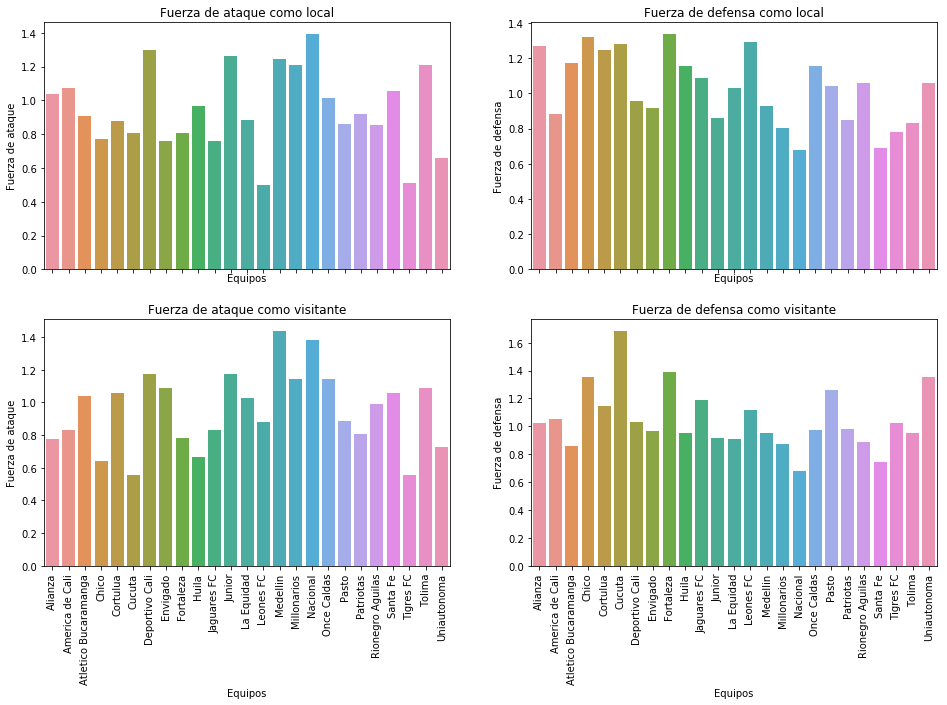

In [14]:
# Graficas defensa de ataque y defensa en condición de local y visitante.
def graficador(equipo,descriptor,titulo,xl,yl,axx,axy):    
    graf_plot = sns.barplot(equipo, descriptor, ax=axarr[axx][axy])
    graf_plot.set_title(titulo)
    graf_plot.set_xlabel(xl)
    graf_plot.set_ylabel(yl)
    for equipo in graf_plot.get_xticklabels():
        equipo.set_rotation(90)

# Función Graficador 
fig, axarr = plt.subplots(2, 2, figsize=(16, 10),sharex=True)
graficador(TABLA_FPC.TEAM, TABLA_FPC.FACL,'Fuerza de ataque como local','Equipos','Fuerza de ataque',0,0)
graficador(TABLA_FPC.TEAM, TABLA_FPC.FDCL,'Fuerza de defensa como local','Equipos','Fuerza de defensa',0,1)
graficador(TABLA_FPC.TEAM, TABLA_FPC.FACV,'Fuerza de ataque como visitante','Equipos','Fuerza de ataque',1,0)
graficador(TABLA_FPC.TEAM, TABLA_FPC.FDCV,'Fuerza de defensa como visitante','Equipos','Fuerza de defensa',1,1)
plt.savefig('foo.png')

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


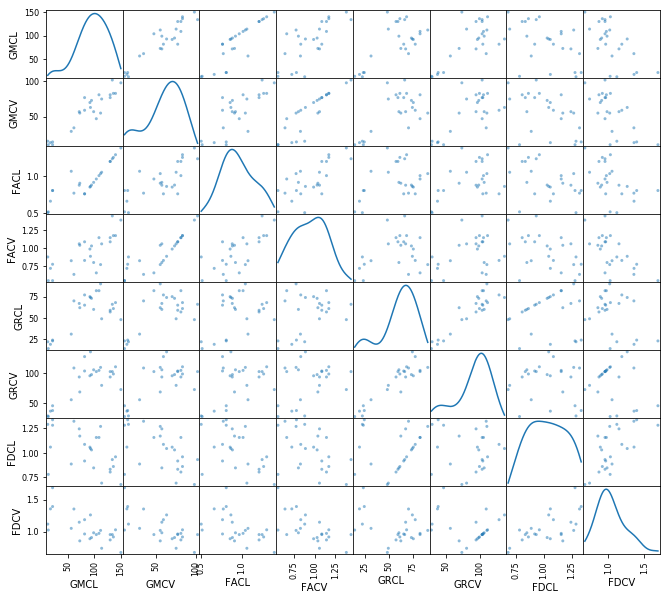

In [15]:
# Visualización de distribución de la información (Tabla de correlaciones)
scatter_matrix(TABLA_FPC[['GMCL','GMCV','FACL','FACV','GRCL','GRCV','FDCL','FDCV']], figsize=(11,10),diagonal="kde")
plt.savefig('Coeficientes.png')

In [16]:
# Creación DataFrame con caracteristicas propias del partido (Tiros al arco)
'''
    EquipoLoc = Equipo Local
    EquipoVis = Equipo Visitante
    FTR = Resultado Tiempo Completo (Ganador) (Donde > L: Local, V: Visitante, E: Empate)
    TirosLoc = Tiros al arco local
    TirosVis = Tiros al arco visitante
'''
# En base a las Fuerza de ataque y defensa de cada equipo en condición de local y visitante,
# Se realiza la asignación a cada uno de los equipos.

# Se crea dataframe TABLA_CARACTERISTICAS, donse se agregaran los atributos para el modelo de predicción
# Los datos se toma a partir del conjunto de datos del  2015 a 2018
TABLA_CARACTERISTICAS = FPC[['EquipoLoc','EquipoVis','FTR','GolLoc','GolVis','TirosLoc','TirosVis']]
F_FACL = []
F_FDCL = []
F_FACV = []
F_FDCV = []

# A cada registro del conjunto de datos se agrga la fuerza de ataque en condicion de local y visitante.
for index,row in TABLA_CARACTERISTICAS.iterrows():
    F_FACL.append(TABLA_FPC[TABLA_FPC['TEAM'] == row['EquipoLoc']]['FACL'].values[0])
    F_FDCL.append(TABLA_FPC[TABLA_FPC['TEAM'] == row['EquipoLoc']]['FDCL'].values[0])
    F_FACV.append(TABLA_FPC[TABLA_FPC['TEAM'] == row['EquipoVis']]['FACV'].values[0])
    F_FDCV.append(TABLA_FPC[TABLA_FPC['TEAM'] == row['EquipoVis']]['FDCV'].values[0])

# Se agregan los datos calculados a las respectivas columnas y a su respectivo equipo.    
TABLA_CARACTERISTICAS['FACL'] = F_FACL
TABLA_CARACTERISTICAS['FDCL'] = F_FDCL
TABLA_CARACTERISTICAS['FACV'] = F_FACV
TABLA_CARACTERISTICAS['FDCV'] = F_FDCV

# Exploración de datos
TABLA_CARACTERISTICAS.head(10)

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,EquipoLoc,EquipoVis,FTR,GolLoc,GolVis,TirosLoc,TirosVis,FACL,FDCL,FACV,FDCV
0,Millonarios,Pasto,L,5,1,11,3,1.206497,0.803949,0.888575,1.262181
1,Cortulua,Envigado,E,1,1,1,3,0.879814,1.244241,1.086037,0.965197
2,Tolima,Chico,L,4,1,6,5,1.206497,0.832158,0.642108,1.354516
3,Once Caldas,Medellin,V,0,2,6,4,1.011601,1.156559,1.438646,0.955916
4,Nacional,Rionegro Aguilas,L,2,0,8,3,1.392111,0.677010,0.987306,0.890951
5,Jaguares FC,Deportivo Cali,E,0,0,5,3,0.761021,1.086037,1.170663,1.030162
6,La Equidad,Santa Fe,E,2,2,3,3,0.881671,1.029619,1.057828,0.742459
7,Patriotas,Huila,L,2,1,3,1,0.918794,0.846262,0.662906,0.955916
8,Cucuta,Junior,L,1,0,4,3,0.806497,1.281382,1.170663,0.918794
9,Uniautonoma,Alianza,E,1,1,4,2,0.659861,1.058533,0.775740,1.020882


In [17]:
'''
    Expresar FTR a terminos numericos: (L, V, E) respectivamente: (1, -1, 0)
'''
def transformarFTR(row):
    if(row.FTR == 'L'):
        return 1
    elif(row.FTR == 'V'):
        return -1
    else:
        return 0

In [18]:
# Se agrega la columna resultado y se adiciona los atributos en base a la función transformarFTR.
TABLA_CARACTERISTICAS["Resultado"] = TABLA_CARACTERISTICAS.apply(lambda row:transformarFTR(row),axis=1)
TABLA_CARACTERISTICAS.tail(10)

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,EquipoLoc,EquipoVis,FTR,GolLoc,GolVis,TirosLoc,TirosVis,FACL,FDCL,FACV,FDCV,Resultado
1570,Envigado,Patriotas,L,2,1,7,8,0.761021,0.916784,0.803949,0.983759,1
1571,Medellin,Leones FC,E,1,1,4,3,1.243619,0.930889,0.879667,1.119062,0
1572,Pasto,Nacional,V,0,2,3,8,0.863109,1.043724,1.382228,0.677494,-1
1573,Rionegro Aguilas,Once Caldas,L,1,0,5,5,0.853828,1.057828,1.142454,0.974478,1
1574,Millonarios,Junior,E,1,1,9,3,1.206497,0.803949,1.170663,0.918794,0
1575,Chico,Tolima,L,2,1,7,2,0.770459,1.321986,1.086037,0.955916,1
1576,Deportivo Cali,La Equidad,L,3,0,6,5,1.299304,0.959097,1.029619,0.909513,1
1577,Atletico Bucaramanga,America de Cali,V,2,3,5,7,0.907153,1.170902,0.828541,1.052769,-1
1578,Jaguares FC,Alianza,L,1,0,1,3,0.761021,1.086037,0.775740,1.020882,1
1579,Huila,Santa Fe,V,0,1,1,3,0.965197,1.156559,1.057828,0.742459,-1


In [19]:
#Se agrega partidos por jugar como prueba de la temporada 2019-1
new_partidos = pd.DataFrame(columns=TABLA_CARACTERISTICAS.columns, data=[['Patriotas','Medellin','L',0,0,0,0,0,0,0,0,1],
['La Equidad','Huila','L',0,0,0,0,0,0,0,0,1],
['Cucuta','Rionegro Aguilas','L',0,0,0,0,0,0,0,0,1],
['Nacional','Once Caldas','E',0,0,0,0,0,0,0,0,0],
['Deportivo Cali','Atletico Bucaramanga','L',0,0,0,0,0,0,0,0,1],
['Santa Fe','Pasto','E',0,0,0,0,0,0,0,0,0],
['Alianza','America de Cali','V',0,0,0,0,0,0,0,0,-1],
['Envigado','Millonarios','V',0,0,0,0,0,0,0,0,-1],
['Tolima','Junior','V',0,0,0,0,0,0,0,0,-1],
['Medellin','La Equidad','E',0,0,0,0,0,0,0,0,0],
['Pasto','Envigado','E',0,0,0,0,0,0,0,0,0],
['Jaguares FC','Deportivo Cali','L',0,0,0,0,0,0,0,0,1],
['Santa Fe','Cucuta','V',0,0,0,0,0,0,0,0,-1],
['Rionegro Aguilas','Alianza','V',0,0,0,0,0,0,0,0,-1],
['Junior','Patriotas','L',0,0,0,0,0,0,0,0,1],
['Atletico Bucaramanga','Nacional','V',0,0,0,0,0,0,0,0,-1],
['Once Caldas','Millonarios','L',0,0,0,0,0,0,0,0,1],
['America de Cali','Tolima','L',0,0,0,0,0,0,0,0,1],
['Deportivo Cali','Huila','E',0,0,0,0,0,0,0,0,0],
['Junior','Medellin','L',0,0,0,0,0,0,0,0,1],
['Nacional','Jaguares FC','L',0,0,0,0,0,0,0,0,1],
['Pasto','Once Caldas','V',0,0,0,0,0,0,0,0,-1],
['Cucuta','Envigado','E',0,0,0,0,0,0,0,0,0],
['Patriotas','America de Cali','E',0,0,0,0,0,0,0,0,0],
['Millonarios','Atletico Bucaramanga','L',0,0,0,0,0,0,0,0,1],
['Tolima','Rionegro Aguilas','L',0,0,0,0,0,0,0,0,1],
['Alianza','Santa Fe','E',0,0,0,0,0,0,0,0,0],
['Atletico Bucaramanga','Pasto','L',0,0,0,0,0,0,0,0,1],
['Jaguares FC','Millonarios','V',0,0,0,0,0,0,0,0,-1],
['Santa Fe','Tolima','V',0,0,0,0,0,0,0,0,-1],
['Envigado','Alianza','L',0,0,0,0,0,0,0,0,1],
['La Equidad','Deportivo Cali','E',0,0,0,0,0,0,0,0,0],
['Rionegro Aguilas','Patriotas','L',0,0,0,0,0,0,0,0,1],
['Huila','Nacional','E',0,0,0,0,0,0,0,0,0],
['America de Cali','Junior','V',0,0,0,0,0,0,0,0,-1],
['Once Caldas','Cucuta','V',0,0,0,0,0,0,0,0,-1],
['Millonarios','Huila','L',0,0,0,0,0,0,0,0,1],
['America de Cali','Medellin','L',0,0,0,0,0,0,0,0,1],
['Alianza','Once Caldas','E',0,0,0,0,0,0,0,0,0],
['Junior','Rionegro Aguilas','E',0,0,0,0,0,0,0,0,0],
['Pasto','Jaguares FC','L',0,0,0,0,0,0,0,0,1],
['Tolima','Envigado','L',0,0,0,0,0,0,0,0,1],
['Cucuta','Atletico Bucaramanga','L',0,0,0,0,0,0,0,0,1],
['Patriotas','Santa Fe','E',0,0,0,0,0,0,0,0,0],
['Nacional','La Equidad','E',0,0,0,0,0,0,0,0,0],
['Huila','Pasto','L',0,0,0,0,0,0,0,0,1],
['Envigado','Patriotas','E',0,0,0,0,0,0,0,0,0],
['Jaguares FC','Cucuta','E',0,0,0,0,0,0,0,0,0],
['La Equidad','Millonarios','V',0,0,0,0,0,0,0,0,-1],
['Atletico Bucaramanga','Alianza','L',0,0,0,0,0,0,0,0,1],
['Rionegro Aguilas','America de Cali','V',0,0,0,0,0,0,0,0,-1],
['Medellin','Deportivo Cali','E',0,0,0,0,0,0,0,0,0],
['Once Caldas','Tolima','L',0,0,0,0,0,0,0,0,1],
['Santa Fe','Junior','E',0,0,0,0,0,0,0,0,0],
['Alianza','Jaguares FC','E',0,0,0,0,0,0,0,0,0],
['Cucuta','Huila','L',0,0,0,0,0,0,0,0,1],
['Pasto','La Equidad','E',0,0,0,0,0,0,0,0,0],
['Patriotas','Once Caldas','L',0,0,0,0,0,0,0,0,1],
['Tolima','Atletico Bucaramanga','E',0,0,0,0,0,0,0,0,0],
['Junior','Envigado','E',0,0,0,0,0,0,0,0,0],
['Rionegro Aguilas','Medellin','V',0,0,0,0,0,0,0,0,-1],
['America de Cali','Santa Fe','E',0,0,0,0,0,0,0,0,0],
['Nacional','Deportivo Cali','E',0,0,0,0,0,0,0,0,0],
['Atletico Bucaramanga','Patriotas','V',0,0,0,0,0,0,0,0,-1],
['Once Caldas','Junior','V',0,0,0,0,0,0,0,0,-1],
['Jaguares FC','Tolima','V',0,0,0,0,0,0,0,0,-1],
['La Equidad','Cucuta','L',0,0,0,0,0,0,0,0,1],
['Santa Fe','Rionegro Aguilas','E',0,0,0,0,0,0,0,0,0],
['Deportivo Cali','Millonarios','E',0,0,0,0,0,0,0,0,0],
['Envigado','America de Cali','L',0,0,0,0,0,0,0,0,1],
['Huila','Alianza','V',0,0,0,0,0,0,0,0,-1],
['Medellin','Nacional','E',0,0,0,0,0,0,0,0,0],
['Tolima','Huila','E',0,0,0,0,0,0,0,0,0],
['Millonarios','Nacional','E',0,0,0,0,0,0,0,0,0],
['Alianza','La Equidad','L',0,0,0,0,0,0,0,0,1],
['Junior','Atletico Bucaramanga','E',0,0,0,0,0,0,0,0,0],
['Pasto','Deportivo Cali','L',0,0,0,0,0,0,0,0,1],
['Patriotas','Jaguares FC','L',0,0,0,0,0,0,0,0,1],
['Medellin','Santa Fe','L',0,0,0,0,0,0,0,0,1],
['Rionegro Aguilas','Envigado','V',0,0,0,0,0,0,0,0,-1],
['America de Cali','Once Caldas','L',0,0,0,0,0,0,0,0,1],
['Deportivo Cali','America de Cali','V',0,0,0,0,0,0,0,0,-1],
['La Equidad','Patriotas','E',0,0,0,0,0,0,0,0,0],
['Envigado','Rionegro Aguilas','E',0,0,0,0,0,0,0,0,0],
['Once Caldas','Pasto','V',0,0,0,0,0,0,0,0,-1],
['Huila','Tolima','V',0,0,0,0,0,0,0,0,-1],
['Jaguares FC','Alianza','E',0,0,0,0,0,0,0,0,0],
['Atletico Bucaramanga','Cucuta','L',0,0,0,0,0,0,0,0,1],
['Millonarios','Santa Fe','E',0,0,0,0,0,0,0,0,0],
['Nacional','Medellin','L',0,0,0,0,0,0,0,0,1],
['Pasto','Millonarios','L',0,0,0,0,0,0,0,0,1],
['Cucuta','Nacional','V',0,0,0,0,0,0,0,0,-1],
['Alianza','Deportivo Cali','L',0,0,0,0,0,0,0,0,1],
['Medellin','Envigado','L',0,0,0,0,0,0,0,0,1],
['Junior','Huila','L',0,0,0,0,0,0,0,0,1],
['America de Cali','Jaguares FC','L',0,0,0,0,0,0,0,0,1],
['Santa Fe','Once Caldas','V',0,0,0,0,0,0,0,0,-1],
['Patriotas','La Equidad','L',0,0,0,0,0,0,0,0,1],
['Rionegro Aguilas','Atletico Bucaramanga','E',0,0,0,0,0,0,0,0,0],
['Huila','Patriotas','E',0,0,0,0,0,0,0,0,0],
['La Equidad','Tolima','E',0,0,0,0,0,0,0,0,0],
['Jaguares FC','Junior','E',0,0,0,0,0,0,0,0,0],
['Atletico Bucaramanga','America de Cali','E',0,0,0,0,0,0,0,0,0],
['Once Caldas','Rionegro Aguilas','L',0,0,0,0,0,0,0,0,1],
['Nacional','Pasto','V',0,0,0,0,0,0,0,0,-1],
['Deportivo Cali','Cucuta','L',0,0,0,0,0,0,0,0,1],
['Millonarios','Medellin','L',0,0,0,0,0,0,0,0,1],
['Envigado','Santa Fe','E',0,0,0,0,0,0,0,0,0],
['Patriotas','Deportivo Cali','V',0,0,0,0,0,0,0,0,-1],
['Tolima','Nacional','L',0,0,0,0,0,0,0,0,1],
['Rionegro Aguilas','Huila','E',0,0,0,0,0,0,0,0,0],
['America de Cali','La Equidad','V',0,0,0,0,0,0,0,0,-1],
['Envigado','Atletico Bucaramanga','V',0,0,0,0,0,0,0,0,-1],
['Cucuta','Pasto','V',0,0,0,0,0,0,0,0,-1],
['Alianza','Millonarios','V',0,0,0,0,0,0,0,0,-1],
['Santa Fe','Jaguares FC','E',0,0,0,0,0,0,0,0,0],
['Medellin','Once Caldas','E',0,0,0,0,0,0,0,0,0],
['Deportivo Cali','Tolima','L',0,0,0,0,0,0,0,0,1],
['Huila','America de Cali','L',0,0,0,0,0,0,0,0,1],
['La Equidad','Junior','E',0,0,0,0,0,0,0,0,0],
['Pasto','Medellin','L',0,0,0,0,0,0,0,0,1],
['Jaguares FC','Rionegro Aguilas','L',0,0,0,0,0,0,0,0,1],
['Nacional','Alianza','L',0,0,0,0,0,0,0,0,1],
['Atletico Bucaramanga','Santa Fe','L',0,0,0,0,0,0,0,0,1],
['Millonarios','Cucuta','L',0,0,0,0,0,0,0,0,1],
['Once Caldas','Envigado','L',0,0,0,0,0,0,0,0,1],
['Once Caldas','Jaguares FC','V',0,0,0,0,0,0,0,0,-1],
['Santa Fe','La Equidad','E',0,0,0,0,0,0,0,0,0],
['Medellin','Atletico Bucaramanga','L',0,0,0,0,0,0,0,0,1],
['Patriotas','Millonarios','V',0,0,0,0,0,0,0,0,-1],
['Alianza','Cucuta','V',0,0,0,0,0,0,0,0,-1],
['Junior','Nacional','E',0,0,0,0,0,0,0,0,0],
['Tolima','Pasto','E',0,0,0,0,0,0,0,0,0],
['Envigado','Huila','E',0,0,0,0,0,0,0,0,0],
['America de Cali','Deportivo Cali','V',0,0,0,0,0,0,0,0,-1],
['Cucuta','Medellin','E',0,0,0,0,0,0,0,0,0],
['Atletico Bucaramanga','Once Caldas','E',0,0,0,0,0,0,0,0,0],
['Pasto','Alianza','L',0,0,0,0,0,0,0,0,1],
['Jaguares FC','Envigado','E',0,0,0,0,0,0,0,0,0],
['Huila','Santa Fe','V',0,0,0,0,0,0,0,0,-1],
['Millonarios','Tolima','V',0,0,0,0,0,0,0,0,-1],
['Deportivo Cali','Junior','E',0,0,0,0,0,0,0,0,0],
['Nacional','Patriotas','L',0,0,0,0,0,0,0,0,1],
['La Equidad','Rionegro Aguilas','E',0,0,0,0,0,0,0,0,0],
['Once Caldas','La Equidad','L',0,0,0,0,0,0,0,0,1],
['Tolima','Alianza','E',0,0,0,0,0,0,0,0,0],
['Medellin','Jaguares FC','L',0,0,0,0,0,0,0,0,1],
['Santa Fe','Deportivo Cali','V',0,0,0,0,0,0,0,0,-1],
['Patriotas','Cucuta','L',0,0,0,0,0,0,0,0,1],
['America de Cali','Millonarios','E',0,0,0,0,0,0,0,0,0],
['Junior','Pasto','E',0,0,0,0,0,0,0,0,0],
['Rionegro Aguilas','Nacional','L',0,0,0,0,0,0,0,0,1],
['Atletico Bucaramanga','Huila','V',0,0,0,0,0,0,0,0,-1]])

In [20]:
# Se agrega partidos de prueba al conjunto de datos
TABLA_CARACTERISTICAS = TABLA_CARACTERISTICAS.append(new_partidos, ignore_index=True)

In [21]:
#Se valida los datos agregados al data frame.
TABLA_CARACTERISTICAS.tail(15)

,EquipoLoc,EquipoVis,FTR,GolLoc,GolVis,TirosLoc,TirosVis,FACL,FDCL,FACV,FDCV,Resultado
1718,Jaguares FC,Envigado,E,0,0,0,0,0.0,0.0,0.0,0.0,0
1719,Huila,Santa Fe,V,0,0,0,0,0.0,0.0,0.0,0.0,-1
1720,Millonarios,Tolima,V,0,0,0,0,0.0,0.0,0.0,0.0,-1
1721,Deportivo Cali,Junior,E,0,0,0,0,0.0,0.0,0.0,0.0,0
1722,Nacional,Patriotas,L,0,0,0,0,0.0,0.0,0.0,0.0,1
1723,La Equidad,Rionegro Aguilas,E,0,0,0,0,0.0,0.0,0.0,0.0,0
1724,Once Caldas,La Equidad,L,0,0,0,0,0.0,0.0,0.0,0.0,1
1725,Tolima,Alianza,E,0,0,0,0,0.0,0.0,0.0,0.0,0
1726,Medellin,Jaguares FC,L,0,0,0,0,0.0,0.0,0.0,0.0,1
1727,Santa Fe,Deportivo Cali,V,0,0,0,0,0.0,0.0,0.0,0.0,-1


In [22]:
#Se agrega 4 campos nuevos que contendran los el promedio de goles y tiros Como (local y visitante) del ultimo tornedo jugado
TABLA_CARACTERISTICAS["utGolesLoc"] = 0.0
TABLA_CARACTERISTICAS["utGolesVis"] = 0.0
TABLA_CARACTERISTICAS["utTirosLoc"] = 0.0
TABLA_CARACTERISTICAS["utTirosVis"] = 0.0

In [23]:
# Se agrega caracteristicas de la ultima temporada que haya jugado el equipo.
k = 38 #Partidos Jugados en la ultima temporada.

# Este ciclo, calcula el promedio de goles y tiros al arco de los ultimos 38 partido (2 temporadas) 
# a partir del partido jugado hacia a tras, es decir, en cada partido se conoce cual ha sido su rendimeinto
# 2 temporadas atras.
for i in range(TABLA_CARACTERISTICAS.shape[0]):
    row = TABLA_CARACTERISTICAS.loc[i]
    local = row.EquipoLoc
    visit = row.EquipoVis
    local_stats = TABLA_CARACTERISTICAS.loc[:i][(TABLA_CARACTERISTICAS.EquipoLoc == local) | (TABLA_CARACTERISTICAS.EquipoVis == local)].tail(k)
    visit_stats = TABLA_CARACTERISTICAS.loc[:i][(TABLA_CARACTERISTICAS.EquipoLoc == visit) | (TABLA_CARACTERISTICAS.EquipoVis == visit)].tail(k)
    TABLA_CARACTERISTICAS.set_value(i, 'utTirosLoc', (local_stats[local_stats["EquipoVis"] == local].sum().TirosVis + local_stats[local_stats["EquipoLoc"] == local].sum().TirosLoc)/k)
    TABLA_CARACTERISTICAS.set_value(i, 'utTirosVis', (visit_stats[visit_stats["EquipoVis"] == visit].sum().TirosVis + visit_stats[visit_stats["EquipoLoc"] == visit].sum().TirosLoc)/k)
    TABLA_CARACTERISTICAS.set_value(i, 'utGolesLoc', (local_stats[local_stats["EquipoVis"] == local].sum().GolVis + local_stats[local_stats["EquipoLoc"] == local].sum().GolLoc)/k)
    TABLA_CARACTERISTICAS.set_value(i, 'utGolesVis', (visit_stats[visit_stats["EquipoVis"] == visit].sum().GolVis + visit_stats[visit_stats["EquipoLoc"] == visit].sum().GolLoc)/k)  

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_v

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to matc

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


In [24]:
#SE actualiza Las fuerza en ataque y defensa de los partidos agregados.
F_FACL = []
F_FDCL = []
F_FACV = []
F_FDCV = []

# Se actualiza la fuerza de ataque y defensa en el dataframe TABLA_CARACTERISTICAS
for index,row in TABLA_CARACTERISTICAS.iterrows():
    F_FACL.append(TABLA_FPC[TABLA_FPC['TEAM'] == row['EquipoLoc']]['FACL'].values[0])
    F_FDCL.append(TABLA_FPC[TABLA_FPC['TEAM'] == row['EquipoLoc']]['FDCL'].values[0])
    F_FACV.append(TABLA_FPC[TABLA_FPC['TEAM'] == row['EquipoVis']]['FACV'].values[0])
    F_FDCV.append(TABLA_FPC[TABLA_FPC['TEAM'] == row['EquipoVis']]['FDCV'].values[0])
    
TABLA_CARACTERISTICAS['FACL'] = F_FACL
TABLA_CARACTERISTICAS['FDCL'] = F_FDCL
TABLA_CARACTERISTICAS['FACV'] = F_FACV
TABLA_CARACTERISTICAS['FDCV'] = F_FDCV

In [25]:
# Se realiza exploración de datos.
TABLA_CARACTERISTICAS

,EquipoLoc,EquipoVis,FTR,GolLoc,GolVis,TirosLoc,TirosVis,FACL,FDCL,FACV,FDCV,Resultado,utGolesLoc,utGolesVis,utTirosLoc,utTirosVis
0,Millonarios,Pasto,L,5,1,11,3,1.206497,0.803949,0.888575,1.262181,1,0.131579,0.026316,0.289474,0.078947
1,Cortulua,Envigado,E,1,1,1,3,0.879814,1.244241,1.086037,0.965197,0,0.026316,0.026316,0.026316,0.078947
2,Tolima,Chico,L,4,1,6,5,1.206497,0.832158,0.642108,1.354516,1,0.105263,0.026316,0.157895,0.131579
3,Once Caldas,Medellin,V,0,2,6,4,1.011601,1.156559,1.438646,0.955916,-1,0.000000,0.052632,0.157895,0.105263
4,Nacional,Rionegro Aguilas,L,2,0,8,3,1.392111,0.677010,0.987306,0.890951,1,0.052632,0.000000,0.210526,0.078947
5,Jaguares FC,Deportivo Cali,E,0,0,5,3,0.761021,1.086037,1.170663,1.030162,0,0.000000,0.000000,0.131579,0.078947
6,La Equidad,Santa Fe,E,2,2,3,3,0.881671,1.029619,1.057828,0.742459,0,0.052632,0.052632,0.078947,0.078947
7,Patriotas,Huila,L,2,1,3,1,0.918794,0.846262,0.662906,0.955916,1,0.052632,0.026316,0.078947,0.026316
8,Cucuta,Junior,L,1,0,4,3,0.806497,1.281382,1.170663,0.918794,1,0.026316,0.000000,0.105263,0.078947
9,Uniautonoma,Alianza,E,1,1,4,2,0.659861,1.058533,0.775740,1.020882,0,0.026316,0.026316,0.105263,0.052632


In [26]:
# Se procede a verificar de forma suiperficial el conteo de registros por el ganador del partido
# 'FTR' (Full Time Resulta - Resultado tiempo completo).
TABLA_CARACTERISTICAS["FTR"].value_counts()

L    826
E    497
V    410
Name: FTR, dtype: int64

In [27]:
# Exploración de datos dimensionalidad.
TABLA_CARACTERISTICAS.shape

(1733, 16)

In [28]:
# Analisis de correlacion de variables
delete_columns = ['EquipoLoc','EquipoVis','FTR','GolLoc','GolVis','TirosLoc','TirosVis','Resultado']
info_fpc = TABLA_CARACTERISTICAS.loc[:TABLA_CARACTERISTICAS.shape[0]-154]
info_fpc = info_fpc.drop(delete_columns, axis=1)
info_fpc.corr()

,FACL,FDCL,FACV,FDCV,utGolesLoc,utGolesVis,utTirosLoc,utTirosVis
FACL,1.000000,-0.544332,-0.022247,0.017502,0.555961,-0.014244,0.431274,-0.010061
FDCL,-0.544332,1.000000,0.016672,-0.015511,-0.347343,0.004249,-0.310915,-0.001752
FACV,-0.022247,0.016672,1.000000,-0.600266,-0.005778,0.513627,0.011111,0.405100
FDCV,0.017502,-0.015511,-0.600266,1.000000,-0.038297,-0.385275,-0.058916,-0.333507
utGolesLoc,0.555961,-0.347343,-0.005778,-0.038297,1.000000,0.436238,0.932249,0.483695
utGolesVis,-0.014244,0.004249,0.513627,-0.385275,0.436238,1.000000,0.490569,0.932416
utTirosLoc,0.431274,-0.310915,0.011111,-0.058916,0.932249,0.490569,1.000000,0.538523
utTirosVis,-0.010061,-0.001752,0.405100,-0.333507,0.483695,0.932416,0.538523,1.000000


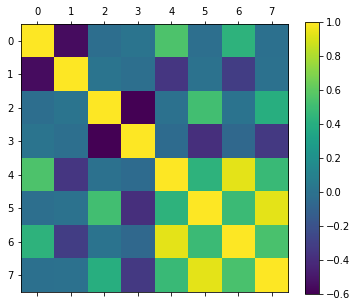

In [29]:
# Se grafica la matriz de correlación
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
cax = ax.matshow(info_fpc.corr())
fig.colorbar(cax)

## Muestreo - Data Splitting

In [30]:
'''
    Se establece los conjuntos de entrenamiento y de prueba, se tomó como entrenamiento las temporadas 2015 a 2017
    y la temporada restante(del año 2018), se establecieron como prueba
    La distribucion obedece a 1200 partidos (75,9%) y 380 (24.1%) respectivamente
'''
# Subconjujnto de entrenamiento (1200 - registros) 2015- 2017
x_DATA_TRAIN = TABLA_CARACTERISTICAS[['FACL','FDCL','FACV','FDCV','utGolesLoc','utGolesVis','utTirosLoc','utTirosVis']].loc[:1199]
Y_DATA_TRAIN = TABLA_CARACTERISTICAS[['Resultado']].loc[:1199]

# Subconjunto de prueba (380 - registros) 2018
X_DATA_TEST = TABLA_CARACTERISTICAS[['FACL','FDCL','FACV','FDCV','utGolesLoc','utGolesVis','utTirosLoc','utTirosVis']].loc[1200:(TABLA_CARACTERISTICAS.shape[0])-154]
Y_DATA_TEST = TABLA_CARACTERISTICAS[['Resultado']].loc[1200:(TABLA_CARACTERISTICAS.shape[0])-154]

# Subconjun de prueba año (153 - registros) 2019
# Se no tema en cuenta aquellos partidos los cuales figura el equipo Union Magdalena ya que es un equipo recientemente
# Ascendido a primera división y no se cuenta con datos de dicho equipo.
X_PREDICCION = TABLA_CARACTERISTICAS[['FACL','FDCL','FACV','FDCV','utGolesLoc','utGolesVis','utTirosLoc','utTirosVis']].loc[(TABLA_CARACTERISTICAS.shape[0])-153:]
Y_PREDICCION = TABLA_CARACTERISTICAS[['Resultado']].loc[(TABLA_CARACTERISTICAS.shape[0])-153:]

## Implementacion de algoritmos

In [31]:
from sklearn.utils.multiclass import unique_labels
#Se importan las librerias de los modelos de prediccion
#Metricas de Evaluación / Clasificación
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Se importan los algoritmos de predicción a implementar
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## * Regresión Logística

[[29, 7, 51], [24, 5, 69], [21, 4, 170]]
Counter({1: 290, -1: 74, 0: 16})


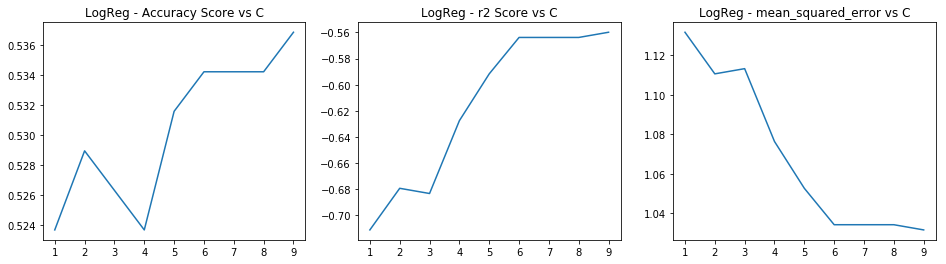

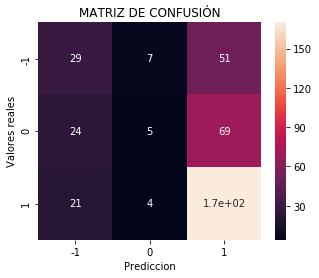

In [32]:
#Regresion Logistica

ant = 0.001
new = 0
scores_logreg_conmat = []
scores_logreg_accsco = []
scores_logreg_r2 = []
scores_logreg_mes = []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]

for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='multinomial', max_iter=500)
    clf_logreg.fit(x_DATA_TRAIN, Y_DATA_TRAIN.values.ravel())
    scores_acc_sco = accuracy_score(Y_DATA_TEST,clf_logreg.predict(X_DATA_TEST))
    scores_r2 = r2_score(Y_DATA_TEST,clf_logreg.predict(X_DATA_TEST))
    scores_mes = mean_squared_error(Y_DATA_TEST,clf_logreg.predict(X_DATA_TEST))
    new = scores_acc_sco
    if new > ant:
        ant = new
        scores_logreg_conmat= []
        scores_logreg_conmat = confusion_matrix(Y_DATA_TEST,clf_logreg.predict(X_DATA_TEST), labels=[-1, 0, 1])
    scores_logreg_accsco.append(scores_acc_sco)
    scores_logreg_r2.append(scores_r2)
    scores_logreg_mes.append(scores_mes)
  
#Creando Grafico

fig = plt.figure(figsize = (16,4))

#Agregando Grafico Accuracy Score
ax1 = fig.add_subplot(1,3,1)
ax1.plot(range(1,len(cs)+1),scores_logreg_accsco)
ax1.set_xticks(range(1,len(cs)+1))
ax1.set_title("LogReg - Accuracy Score vs C")

#Agregando grafico R-Cuadrado
ax2 = fig.add_subplot(1,3,2)
ax2.plot(range(1,len(cs)+1),scores_logreg_r2)
ax2.set_xticks(range(1,len(cs)+1))
ax2.set_title("LogReg - r2 Score vs C")

#Agregando grafico raíz del error cuadrático medio
ax3 = fig.add_subplot(1,3,3)
ax3.plot(range(1,len(cs)+1),scores_logreg_mes)
ax3.set_xticks(range(1,len(cs)+1))
ax3.set_title("LogReg - mean_squared_error vs C")

import collections
df_cm = pd.DataFrame(scores_logreg_conmat, index = [i for i in range(-1,2)], columns = [i for i in range(-1,2)])
plt.figure(figsize = (5,4))
plt.set_cmap('Blues')
sns.heatmap(df_cm, annot=True)
plt.xlabel('Prediccion')
plt.ylabel('Valores reales')
plt.title('MATRIZ DE CONFUSIÓN')
print(scores_logreg_conmat.tolist())
print(collections.Counter(clf_logreg.predict(X_DATA_TEST)))

In [33]:
## Resultados metricas de evaluacion - Regresion Lineal
max_logreg_r2s = max(scores_logreg_r2)
max_logreg_mse = max(scores_logreg_mes)
max_logreg_acc = max(scores_logreg_accsco)
print(' accuracy score: ',max_logreg_acc)
print('')
from sklearn.metrics import classification_report
labels=['-1', '0', '1']
print(classification_report(Y_DATA_TEST, clf_logreg.predict(X_DATA_TEST), target_names=labels))

 accuracy score:  0.5368421052631579

              precision    recall  f1-score   support

          -1       0.39      0.33      0.36        87
           0       0.31      0.05      0.09        98
           1       0.59      0.87      0.70       195

   micro avg       0.54      0.54      0.54       380
   macro avg       0.43      0.42      0.38       380
weighted avg       0.47      0.54      0.46       380



In [34]:
PRUEBA = TABLA_CARACTERISTICAS[['FTR']].loc[1200:(TABLA_CARACTERISTICAS.shape[0])-153]
PRUEBA["FTR"].value_counts()


L    196
E     98
V     87
Name: FTR, dtype: int64

## * Random Forest

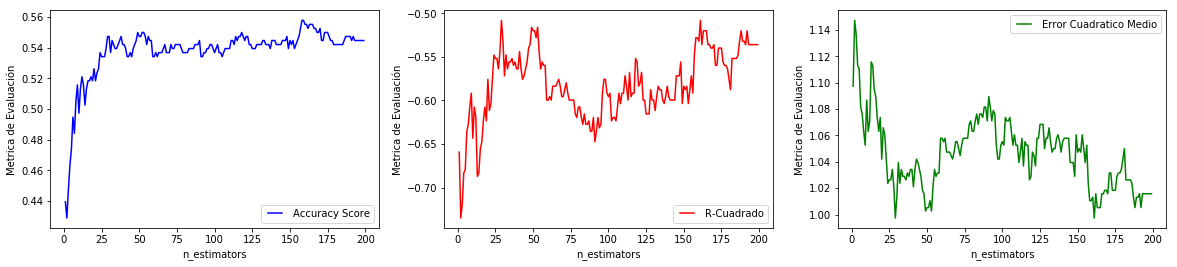

In [35]:
#Random Forest

from matplotlib.legend_handler import HandlerLine2D
rfsco_acc_sco =[]
rfsco_r2 = []
rfsco_mse = []
x_values = []


for i in range (1,200):
    clf_ranfor = RandomForestClassifier(n_estimators=i,  max_depth = 7, random_state = 0)
    clf_ranfor.fit(x_DATA_TRAIN, Y_DATA_TRAIN.values.ravel())
    scores_ran_for = accuracy_score(Y_DATA_TEST,clf_ranfor.predict(X_DATA_TEST))
    scores_r2 = r2_score(Y_DATA_TEST,clf_ranfor.predict(X_DATA_TEST))
    scores_mes = mean_squared_error(Y_DATA_TEST,clf_ranfor.predict(X_DATA_TEST))
    rfsco_acc_sco.append(scores_ran_for)
    rfsco_r2.append(scores_r2)
    rfsco_mse.append(scores_mes)
    x_values.append(i)

metricas = plt.figure(figsize = (20,4))

def graficadorrf(metrica, label, color, pos):
    gr1 = metricas.add_subplot(1,3,pos)
    p1, = gr1.plot(x_values, metrica, color, label=label)
    gr1.legend(handler_map={p1: HandlerLine2D(numpoints=3)})
    gr1.set_ylabel('Metrica de Evaluación')
    gr1.set_xlabel('n_estimators')
    
graficadorrf(rfsco_acc_sco,'Accuracy Score', 'b',1)
graficadorrf(rfsco_r2,'R-Cuadrado', 'r',2)
graficadorrf(rfsco_mse,'Error Cuadratico Medio', 'g',3)

[[29, 7, 51], [24, 5, 69], [21, 4, 170]]
Counter({1: 296, -1: 62, 0: 22})
accuracy score:  0.5578947368421052

              precision    recall  f1-score   support

          -1       0.42      0.30      0.35        87
           0       0.55      0.12      0.20        98
           1       0.59      0.89      0.71       195

   micro avg       0.56      0.56      0.56       380
   macro avg       0.52      0.44      0.42       380
weighted avg       0.54      0.56      0.50       380



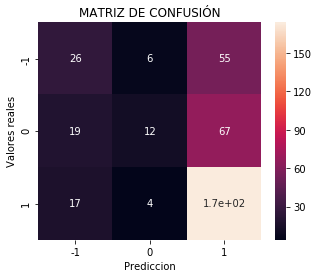

In [36]:
import collections
clf_ranfor = RandomForestClassifier(n_estimators = 158,  max_depth = 7, random_state = 0)
clf_ranfor.fit(x_DATA_TRAIN, Y_DATA_TRAIN.values.ravel())
scores_ran_for = accuracy_score(Y_DATA_TEST,clf_ranfor.predict(X_DATA_TEST))
scores_randfor_conmat = confusion_matrix(Y_DATA_TEST,clf_ranfor.predict(X_DATA_TEST), labels=[-1, 0, 1])
resultado = clf_ranfor.predict(X_DATA_TEST)
print(scores_logreg_conmat.tolist())
print(collections.Counter(resultado))

# Gráfico matriz de confusión
df_cm = pd.DataFrame(scores_randfor_conmat, index = [i for i in range(-1,2)], columns = [i for i in range(-1,2)])
plt.figure(figsize = (5,4))
plt.set_cmap('Blues')
sns.heatmap(df_cm, annot=True)
plt.xlabel('Prediccion')
plt.ylabel('Valores reales')
plt.title('MATRIZ DE CONFUSIÓN')

# Resultados Accuracy Score y reporte matriz de confusión.
scores_logreg_conmat
print( 'accuracy score: ',scores_ran_for)
print('')
print(classification_report(Y_DATA_TEST, clf_ranfor.predict(X_DATA_TEST), target_names=labels))

## Resultados metricas de evaluacion - Regresion Lineal
max_ranfor_r2s = max(rfsco_r2)
max_ranfor_mse = max(rfsco_mse)
max_ranfor_acc = max(rfsco_acc_sco)



## * Máquinas de soporte vectorial

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C

[310, 0.5263157894736842]


C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[20, 3, 64], [17, 4, 77], [18, 1, 176]]
Counter({1: 317, -1: 55, 0: 8})

accuracy score: 0.5263157894736842

              precision    recall  f1-score   support

          -1       0.36      0.23      0.28        87
           0       0.50      0.04      0.08        98
           1       0.56      0.90      0.69       195

   micro avg       0.53      0.53      0.53       380
   macro avg       0.47      0.39      0.35       380
weighted avg       0.50      0.53      0.44       380



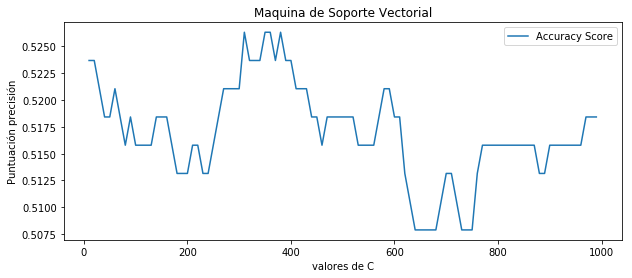

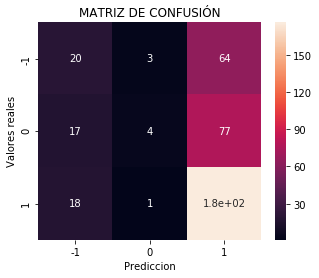

In [37]:
## Maquinas de soporte vectorial
'''
Kernel=rbf >  0.5263157894736842

'''

# Ejecución algoritmo de Maquinas de soporte vectorial
msv_scores = []
msv_values = []
valor_final = []
ant = 0.001
new = 0
for c in range(10, 1000, 10):
    clf_msv = SVC(kernel='rbf', C=c).fit(x_DATA_TRAIN, Y_DATA_TRAIN.values.ravel())
    scores_acc_sco = accuracy_score(Y_DATA_TEST,clf_msv.predict(X_DATA_TEST))
    new = scores_acc_sco
    if new > ant:
        ant = new
        valor_final = []
        valor_final.append(c)
        valor_final.append(ant)
    msv_scores.append(scores_acc_sco)
    msv_values.append(c)

# Grafico de precisión en función de la constante de penalización.    
plt.figure(figsize = (10,4))
plt.plot(msv_values,msv_scores)
plt.legend(['Accuracy Score'])
plt.title('Maquina de Soporte Vectorial')
plt.xlabel('valores de C')
plt.ylabel('Puntuación precisión')

print(valor_final)
plt.savefig('msv.png')

# Ejecución del algoritmo con la constante de penalización que mejor resultado obtuvo
clf_msv = SVC(kernel='rbf', C=310).fit(x_DATA_TRAIN, Y_DATA_TRAIN.values.ravel())   
scores_svc_conmat = confusion_matrix(Y_DATA_TEST,clf_msv.predict(X_DATA_TEST), labels=[-1, 0, 1])

# Gráfico matriz de confusión
df_cm = pd.DataFrame(scores_svc_conmat, index = [i for i in range(-1,2)], columns = [i for i in range(-1,2)])
plt.figure(figsize = (5,4))
plt.set_cmap('Blues')
sns.heatmap(df_cm, annot=True)
plt.xlabel('Prediccion')
plt.ylabel('Valores reales')
plt.title('MATRIZ DE CONFUSIÓN')

print(scores_svc_conmat.tolist())
print(collections.Counter(clf_msv.predict(X_DATA_TEST)))
print('')
print( 'accuracy score: 0.5263157894736842')
print('')
print(classification_report(Y_DATA_TEST, clf_msv.predict(X_DATA_TEST), target_names=labels))


## Resultados

In [38]:
# Creación del subconjunto de datos de entrenamiento 2015 - 2018
X = TABLA_CARACTERISTICAS[['FACL','FDCL','FACV','FDCV','utGolesLoc','utGolesVis','utTirosLoc','utTirosVis']].loc[:(TABLA_CARACTERISTICAS.shape[0])-154]
Y = TABLA_CARACTERISTICAS[['Resultado']].loc[:(TABLA_CARACTERISTICAS.shape[0])-154]

# Ejecución de los algoritmos de predicción
clf_logreg = LogisticRegression(C=10,solver='lbfgs',multi_class='multinomial', max_iter=500).fit(X, Y.values.ravel())
clf_ranfor = RandomForestClassifier(n_estimators = 158,  max_depth = 7, random_state = 0).fit(X, Y.values.ravel())
clf_msv = SVC(kernel='rbf', C=310).fit(X, Y.values.ravel())

# Variables que contienen la predicción de cada algoritmo
y_pred_logreg = clf_logreg.predict(X_PREDICCION)
y_pred_ranfor = clf_ranfor.predict(X_PREDICCION)
y_pred_smv = clf_msv.predict(X_PREDICCION)

# Presicion de cada algoritmo en base a los resultados del año 2019
accuracy_logit = accuracy_score(Y_PREDICCION,y_pred_logreg)
accuracy_ranfor = accuracy_score(Y_PREDICCION,y_pred_ranfor)
accuracy_msv = accuracy_score(Y_PREDICCION,y_pred_smv)

# Crea un dataframe FPC_2019: en ella reposa los resultados reales y la predicción de los partidos de futbol.
FPC_2019 = TABLA_CARACTERISTICAS[['EquipoLoc','EquipoVis','FTR']].loc[(TABLA_CARACTERISTICAS.shape[0])-153:]
FPC_2019['Res_RegresionLogistica'] = y_pred_logreg
FPC_2019['Res_RandomForest'] = y_pred_ranfor
FPC_2019['Res_SVM'] = y_pred_smv

# Exploración de datos
FPC_2019

C:\Users\efarias\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,EquipoLoc,EquipoVis,FTR,Res_RegresionLogistica,Res_RandomForest,Res_SVM
1580,Patriotas,Medellin,L,-1,-1,-1
1581,La Equidad,Huila,L,1,1,1
1582,Cucuta,Rionegro Aguilas,L,-1,-1,-1
1583,Nacional,Once Caldas,E,1,1,1
1584,Deportivo Cali,Atletico Bucaramanga,L,1,1,1
1585,Santa Fe,Pasto,E,1,1,1
1586,Alianza,America de Cali,V,1,1,1
1587,Envigado,Millonarios,V,1,-1,1
1588,Tolima,Junior,V,1,1,1
1589,Medellin,La Equidad,E,1,1,1


In [39]:
'''
    Expresar Valores numericos a categoricos: (1, -1, 0) respectivamente: (L, V, E)
'''
def transformarFTRBACK(row, col_name):
    if(row[col_name] == 1):
        return 'L'
    elif(row[col_name] == -1):
        return 'V'
    else:
        return 'E'

In [40]:
# Se transforma los resultados de valores numericos a categoricos.

FPC_2019['Res_Logit'] = FPC_2019.apply(lambda row: transformarFTRBACK(row,"Res_RegresionLogistica"),axis=1)
FPC_2019['Res_RanForest'] = FPC_2019.apply(lambda row: transformarFTRBACK(row,"Res_RandomForest"),axis=1)
FPC_2019['Res_SupVecMachine'] = FPC_2019.apply(lambda row: transformarFTRBACK(row,"Res_SVM"),axis=1)

# SE eleimina las columnas que contenia la clasificación de los partidos en forma numerica.
FPC_2019.drop(["Res_RegresionLogistica", "Res_RandomForest","Res_SVM"],axis=1,inplace=True)

Text(753.2117647058824, 0.5, 'Real')

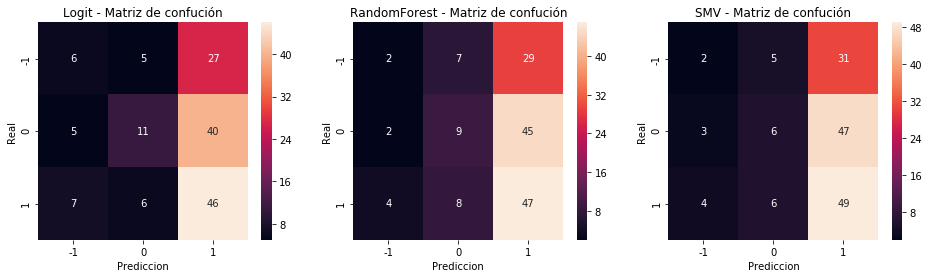

In [41]:
# Se grafica la matriz de consusion de cada uno de los algoritmos en función de los resultados del año 2019
scores_mc_logit = confusion_matrix(Y_PREDICCION,clf_logreg.predict(X_PREDICCION), labels=[-1, 0, 1])
scores_mc_ranfor = confusion_matrix(Y_PREDICCION,clf_ranfor.predict(X_PREDICCION), labels=[-1, 0, 1])
scores_mc_msv = confusion_matrix(Y_PREDICCION,clf_msv.predict(X_PREDICCION), labels=[-1, 0, 1])

fig = plt.figure(figsize = (16,4))

#Agregando Grafico Matriz de confución
df_cm = pd.DataFrame(scores_mc_logit, index = [i for i in range(-1,2)], columns = [i for i in range(-1,2)])
ax4 = fig.add_subplot(1,3,1)
ax4.set_title('Logit - Matriz de confución')
sns.heatmap(df_cm, annot=True)
ax4.set_xlabel('Prediccion')
ax4.set_ylabel('Real')

#Agregando Grafico Matriz de confución
df_cm = pd.DataFrame(scores_mc_ranfor, index = [i for i in range(-1,2)], columns = [i for i in range(-1,2)])
ax4 = fig.add_subplot(1,3,2)
ax4.set_title('RandomForest - Matriz de confución')
sns.heatmap(df_cm, annot=True)
ax4.set_xlabel('Prediccion')
ax4.set_ylabel('Real')

#Agregando Grafico Matriz de confución
df_cm = pd.DataFrame(scores_mc_msv, index = [i for i in range(-1,2)], columns = [i for i in range(-1,2)])
ax4 = fig.add_subplot(1,3,3)
ax4.set_title('SMV - Matriz de confución')
sns.heatmap(df_cm, annot=True)
ax4.set_xlabel('Prediccion')
ax4.set_ylabel('Real')



In [42]:
print('\n\n******************************************************************')
print('Regresion Lineal: ',collections.Counter(y_pred_logreg))
print('Presición: ',accuracy_logit)
print('******************************************************************')
print(classification_report(Y_PREDICCION,y_pred_logreg, target_names=labels))
print('__________________________________________________________________\n\n')

print('******************************************************************')
print('Random Forest: ',collections.Counter(y_pred_ranfor))
print('Presición: ',accuracy_ranfor)
print('******************************************************************')
print(classification_report(Y_PREDICCION,y_pred_ranfor, target_names=labels))
print('__________________________________________________________________\n\n')

print('******************************************************************')
print('SVC: ',collections.Counter(y_pred_smv))
print('Presición: ',accuracy_msv)
print('******************************************************************')
print(classification_report(Y_PREDICCION,y_pred_smv, target_names=labels))
print('__________________________________________________________________\n\n')



******************************************************************
Regresion Lineal:  Counter({1: 113, 0: 22, -1: 18})
Presición:  0.4117647058823529
******************************************************************
              precision    recall  f1-score   support

          -1       0.33      0.16      0.21        38
           0       0.50      0.20      0.28        56
           1       0.41      0.78      0.53        59

   micro avg       0.41      0.41      0.41       153
   macro avg       0.41      0.38      0.34       153
weighted avg       0.42      0.41      0.36       153

__________________________________________________________________


******************************************************************
Random Forest:  Counter({1: 121, 0: 24, -1: 8})
Presición:  0.3790849673202614
******************************************************************
              precision    recall  f1-score   support

          -1       0.25      0.05      0.09        38
         

In [43]:
# Se exporta la información en un archivo Excel para su posterior validación.
FPC_2019.to_excel("output.xlsx")